In [1]:
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy import asarray
from sklearn import model_selection, metrics
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
data = pd.read_csv('habitat_coding.csv', index_col = 'id')
data.head(5)

,oxygen_regulation,radiation_protection,power_generation,communications_facilities,shape,area,transportation
id,,,,,,,
1,1,1,2,2,1,0,0
2,1,0,2,2,2,2,0
3,1,2,2,2,1,2,2
4,1,2,2,2,2,0,0
5,1,2,1,2,0,1,2


In [2]:
train_images = [None] * len(data.index)
directory = os.path.join(os.getcwd(),'images_500')
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        extension = filename.find('.')
        image_num = int(filename[:extension]) - 1
        print("Image " + str(image_num) + " has been loaded")
        image = Image.open(f)
        pic = asarray(image)
        # convert from integers to floats
        pic = pic.astype('float32')
        # normalize to the range 0-1
        pic /= 255.0
        train_images[image_num] = pic

Image 0 has been loaded
Image 9 has been loaded
Image 10 has been loaded
Image 11 has been loaded
Image 12 has been loaded
Image 13 has been loaded
Image 14 has been loaded
Image 15 has been loaded
Image 16 has been loaded
Image 17 has been loaded
Image 18 has been loaded
Image 1 has been loaded
Image 19 has been loaded
Image 20 has been loaded
Image 21 has been loaded
Image 22 has been loaded
Image 23 has been loaded
Image 2 has been loaded
Image 3 has been loaded
Image 4 has been loaded
Image 5 has been loaded
Image 6 has been loaded
Image 7 has been loaded
Image 8 has been loaded


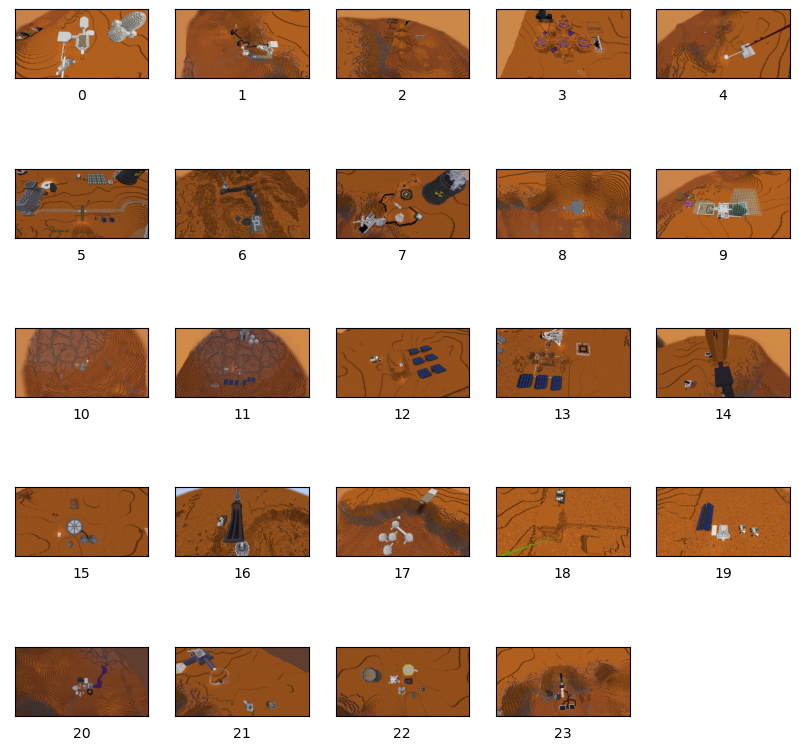

In [3]:
plt.figure(figsize=(10,10))
for i in range(len(data.index)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(i)
plt.show()

In [4]:
epochs=10
num = 1
models = {
    }  

for (columnName, columnData) in data.iteritems():
    X_train = []
    y_train = []
    train_labels = data[columnName].to_numpy()
    class_labels = np.unique(train_labels)
    num_classes = len(class_labels)
    print(columnName)
    for index in range(23):
        X_train.append(train_images[index])
        y_train.append(train_labels[index])
    model = Sequential([
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(num_classes)
        ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    history = model.fit(
          np.array(X_train),
          np.array(y_train),
          epochs=epochs
        )
    models[columnName] = model
     

oxygen_regulation
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6933 - accuracy: 0.4783
Epoch 2/10
1/1 [==============================] - 1s 838ms/step - loss: 8.6361 - accuracy: 0.8261
Epoch 3/10
1/1 [==============================] - 1s 817ms/step - loss: 6.9634 - accuracy: 0.8261
Epoch 4/10
1/1 [==============================] - 1s 830ms/step - loss: 3.9392 - accuracy: 0.8261
Epoch 5/10
1/1 [==============================] - 1s 839ms/step - loss: 1.6496 - accuracy: 0.8261
Epoch 6/10
1/1 [==============================] - 1s 836ms/step - loss: 0.4146 - accuracy: 0.8261
Epoch 7/10
1/1 [==============================] - 1s 831ms/step - loss: 0.8504 - accuracy: 0.1739
Epoch 8/10
1/1 [==============================] - 1s 840ms/step - loss: 0.5891 - accuracy: 0.8261
Epoch 9/10
1/1 [==============================] - 1s 826ms/step - loss: 0.4570 - accuracy: 0.8261
Epoch 10/10
1/1 [==============================] - 1s 841ms/step - loss: 0.4831 - accuracy: 0.8261
radi

In [6]:
results = {}
for model in models:
    predictions = models[model].predict(np.array([train_images[23]]))
    results[model] = np.argmax(tf.nn.softmax(predictions[0]))
results

1/1 [==============================] - 0s 59ms/step


{'oxygen_regulation': 1,
 'radiation_protection': 2,
 'power_generation': 2,
 'communications_facilities': 2,
 'shape': 1,
 'area': 0,
 'transportation': 0}

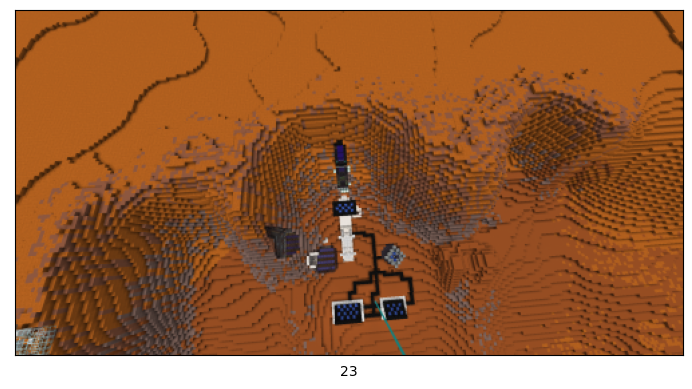

In [10]:
plt.figure(figsize=(50,50))
plt.subplot(5,5,i+1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[23])
plt.xlabel(23)
plt.show()

In [14]:
min_val = list(results.values())[0]
min_indices = []
for i in range(len(list(results))):
    curr = list(results.values())[i]
    if curr < min_val:
        min_val = curr
        min_indices = [i]
    elif curr == min_val:
        min_indices.append(i)
min_indices

[5, 6]

In [16]:
import random
feedback_category = list(results)[random.randint(min_indices[0], min_indices[len(min_indices)-1])]
feedback_category

'transportation'

In [17]:
feedback = pd.read_csv('build_feedback.csv')
feedback.head(5)

,feature,0,1,2
0,oxygen_regulation,This is a great start! It doesn't seem like yo...,This is perfect! I love that you included oxyg...,NaN
1,radiation_protection,This is a great start! It seems like you are u...,You are making great progress on your base! It...,This is perfect! I love that you included mult...
2,power_generation,This is a great start! It seems like you have...,You are making great progress on your base! It...,This is perfect! I love that you included sola...
3,communications_facilities,This is a great start! It seems you have not b...,You are making great progress on your base! It...,This is perfect! I love that you included comm...
4,shape,This is a great start! It seems like your buil...,You are making great progress on your base! Yo...,This is perfect! I love that your buildings ar...


In [24]:
feedback.loc[feedback['feature'] == feedback_category][str(results[feedback_category])]

6    This is a great start! It seems like you have ...
Name: 0, dtype: object